In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
csv_train_path='train.csv'
csv_test_path='test.csv'
train_unprepared=pd.read_csv(csv_train_path)
test_unprepared=pd.read_csv(csv_test_path)
display(train_unprepared.sample())
display(test_unprepared.sample())

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
26173,32399,0.31,Ideal,E,VVS2,62.0,54.0,791,4.38,4.4,2.72


,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
6671,34599,0.27,Very Good,F,VS2,58.7,58.0,4.25,4.3,2.51


In [3]:
train_unprepared.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,26758.804554,0.796964,61.746080,57.439542,3942.706343,5.724376,5.728122,3.534367
std,15484.904515,0.481455,1.435246,2.240196,4023.534556,1.132496,1.159641,0.714543
min,2.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13326.750000,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,26824.500000,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,40290.250000,1.030000,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


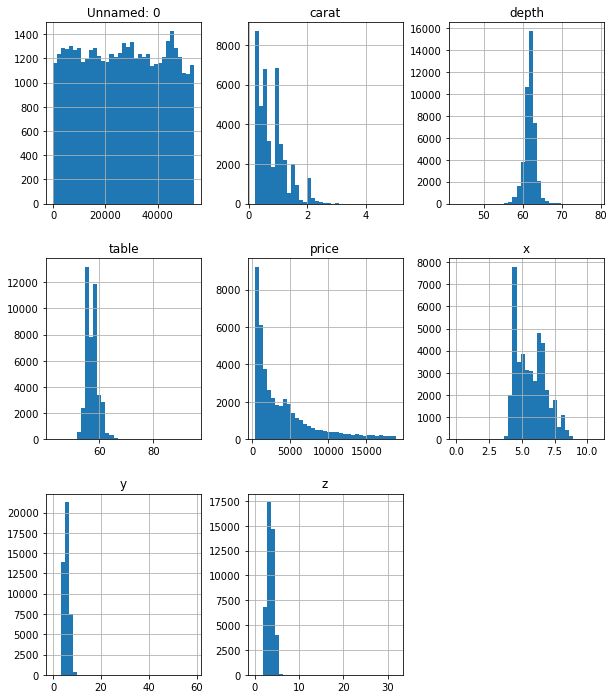

In [4]:
# only in a Jupyter notebook
%matplotlib inline 

import matplotlib.pyplot as plt
train_unprepared.hist(bins=35,figsize=(10,12))
plt.show()


In [5]:
train_unprepared_corr=train_unprepared.corr()
train_unprepared_corr["price"].sort_values(ascending=False)

price         1.000000
carat         0.923801
x             0.887483
y             0.863748
z             0.860625
table         0.136975
depth        -0.014393
Unnamed: 0   -0.301711
Name: price, dtype: float64

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='carat', ylabel='price'>,
        <AxesSubplot:xlabel='x', ylabel='price'>,
        <AxesSubplot:xlabel='y', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='carat'>,
        <AxesSubplot:xlabel='carat', ylabel='carat'>,
        <AxesSubplot:xlabel='x', ylabel='carat'>,
        <AxesSubplot:xlabel='y', ylabel='carat'>],
       [<AxesSubplot:xlabel='price', ylabel='x'>,
        <AxesSubplot:xlabel='carat', ylabel='x'>,
        <AxesSubplot:xlabel='x', ylabel='x'>,
        <AxesSubplot:xlabel='y', ylabel='x'>],
       [<AxesSubplot:xlabel='price', ylabel='y'>,
        <AxesSubplot:xlabel='carat', ylabel='y'>,
        <AxesSubplot:xlabel='x', ylabel='y'>,
        <AxesSubplot:xlabel='y', ylabel='y'>]], dtype=object)

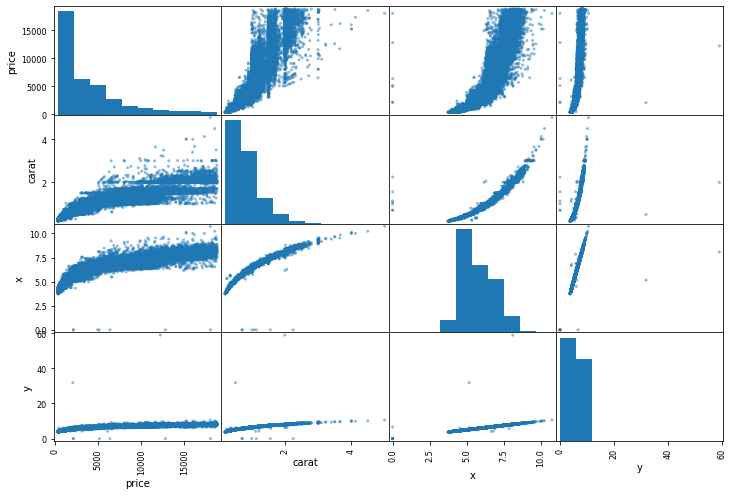

In [6]:
from pandas.plotting import scatter_matrix
attributes = ["price", "carat", "x",
 'y']
scatter_matrix(train_unprepared[attributes], figsize=(12, 8))


C:\Users\momun\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


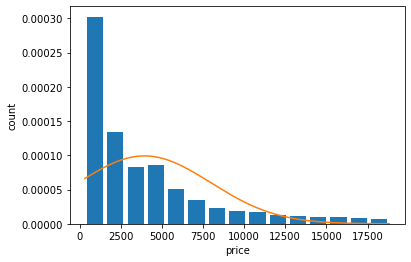

In [7]:
from scipy.stats import norm
%matplotlib inline
import matplotlib.pyplot as plt
rng=np.arange(train_unprepared.price.min(),train_unprepared.price.max(),0.1)
plt.hist(train_unprepared.price,bins=15,rwidth=0.8,density=True)
plt.xlabel("price")
plt.ylabel("count")
plt.plot(rng,norm.pdf(rng,train_unprepared.price.mean(),train_unprepared.price.std()))

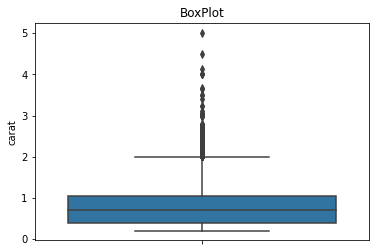

In [8]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.boxplot(y=train_unprepared.carat)
plt.title("BoxPlot")
plt.show() 

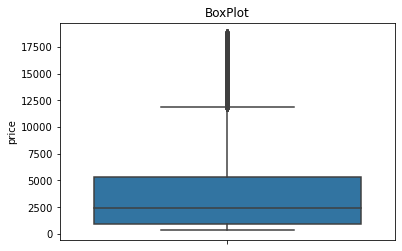

In [9]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.boxplot(y=train_unprepared.price)
plt.title("BoxPlot")
plt.show() 

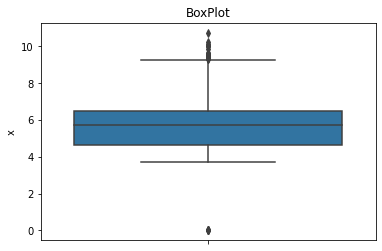

In [10]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.boxplot(y=train_unprepared.x)
plt.title("BoxPlot")
plt.show() 

### Seperate the numerical and the categorical attributes

In [12]:
#train data
train_num=train_unprepared.select_dtypes(['float64','int64'])
train_obj=train_unprepared.select_dtypes('object')
#test data
test_num=test_unprepared.select_dtypes(['float64','int64'])
test_obj=test_unprepared.select_dtypes('object')

### Seperate the categorical attribute to attribute need to be ordered and attribute does not need to be ordered

In [13]:
#train data
train_obj_ord=train_obj[['cut','clarity']]
train_obj_not=train_obj[['color']]
#test data
test_obj_ord=test_obj[['cut','clarity']]
test_obj_not=test_obj[['color']]

### ordinal Encoding

In [14]:
from sklearn.preprocessing import OrdinalEncoder

cut_categories=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
clarity_categories=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
ordinal_encoder=OrdinalEncoder(categories=[cut_categories,clarity_categories])

#Train Data:
diamond_cat_encoded=ordinal_encoder.fit_transform(train_obj_ord)
train_obj_ord=pd.DataFrame(diamond_cat_encoded,columns=train_obj_ord.columns)

#test Data:
diamond_cat_encoded=ordinal_encoder.fit_transform(test_obj_ord)
test_obj_ord=pd.DataFrame(diamond_cat_encoded,columns=['cut','clarity'])

### OneHotEncoder

In [15]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder=OneHotEncoder()
#train data:
diamond_cat_encoded=one_hot_encoder.fit_transform(train_obj_not)
categories=one_hot_encoder.categories_[0]
train_obj_not=pd.DataFrame(diamond_cat_encoded.toarray(),dtype=np.float64,columns=categories)
#test data:
diamond_cat_encoded=one_hot_encoder.fit_transform(test_obj_not)
test_obj_not=pd.DataFrame(diamond_cat_encoded.toarray(),dtype=np.float64,columns=categories)

### Concating Data

In [16]:
#train data
training_data=pd.concat([train_num,train_obj_ord,train_obj_not],axis=1)
display(training_data.sample())
testing_data=pd.concat([test_num,test_obj_ord,test_obj_not],axis=1)
display(testing_data.sample())

,Unnamed: 0,carat,depth,table,price,x,y,z,cut,clarity,D,E,F,G,H,I,J
42018,52590,0.96,66.8,61.0,2539,6.15,6.04,4.07,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


,Unnamed: 0,carat,depth,table,x,y,z,cut,clarity,D,E,F,G,H,I,J
8589,42772,0.62,63.1,52.0,5.39,5.53,3.45,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Attributes combination

In [17]:
#train data:
training_data["volume"]=training_data['x']*training_data['y']*training_data['z']
training_data=training_data.drop(['x','y','z'],axis=1)
#test data:
testing_data["volume"]=testing_data['x']*testing_data['y']*testing_data['z']
testing_data=testing_data.drop(['x','y','z'],axis=1)

In [18]:
display(training_data.sample())
display(testing_data.sample())

,Unnamed: 0,carat,depth,table,price,cut,clarity,D,E,F,G,H,I,J,volume
31687,39534,0.4,61.6,58.0,1080,3.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,67.032


,Unnamed: 0,carat,depth,table,cut,clarity,D,E,F,G,H,I,J,volume
8585,42753,0.58,62.2,55.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,96.9624


### preparing the data

In [19]:
X_train=training_data.drop(['Unnamed: 0','price'],axis=1)
Y_train=training_data['price']
X_train

,carat,depth,table,cut,clarity,D,E,F,G,H,I,J,volume
0,0.21,59.8,61.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,34.505856
1,0.29,62.4,58.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,46.724580
2,0.31,63.3,58.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,51.917250
3,0.24,62.8,57.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,38.693952
4,0.24,62.3,57.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,38.830870
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43035,0.72,62.7,59.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,116.721246
43036,0.72,60.8,57.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,115.920000
43037,0.72,63.1,55.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,118.110175
43038,0.86,61.0,58.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,140.766120


In [20]:
X_test=testing_data.drop('Unnamed: 0',axis=1)
X_test

,carat,depth,table,cut,clarity,D,E,F,G,H,I,J,volume
0,0.23,61.5,55.0,4.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,38.202030
1,0.23,56.9,65.0,1.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,38.076885
2,0.26,61.9,55.0,2.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.321081
3,0.23,59.4,61.0,2.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,38.718000
4,0.23,62.8,56.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37.704420
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10895,0.70,62.8,60.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,111.489755
10896,0.70,63.1,59.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,112.317030
10897,0.70,60.5,59.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,114.126912
10898,0.70,61.2,59.0,2.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,113.588332


### evalute the model that we will use:

In [21]:
#split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_train,Y_train,train_size=0.8,random_state=42)

In [22]:
#train the model
from sklearn.ensemble import RandomForestRegressor
dt = RandomForestRegressor()
dt.fit(x_train,y_train)

RandomForestRegressor()

In [23]:
#make predictions
predictions=dt.predict(x_test)

#### evaluate the accuracy

In [24]:
from sklearn.metrics import r2_score
lr=r2_score(y_test,predictions) * 100
lr

98.10188036040664



#### evaluate using MSE

In [25]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions)
rmse=np.sqrt(mse)
rmse

548.5201990644218

#### evaluate using cross validation

In [26]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(dt,X_train,Y_train,scoring="neg_mean_squared_error",cv=10)
##we used X_train and Y_train instead of x_train, y_train because cross_val_score will split the data itself

In [ ]:
rmse_scores=np.sqrt(-scores)
rmse_scores.mean

### Train The Model for the final Predictions(X_train)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
dt = RandomForestRegressor()
dt.fit(X_train,Y_train)

### Make The Final Predictions(X_test)

In [ ]:
y_predictions = dt.predict(X_test)
first_col = list(testing_data['Unnamed: 0'])
price = list(y_predictions)
sub = pd.DataFrame({'Unnamed: 0':first_col,'price':price})
sub.to_csv('submission.csv',index = False)